In [28]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageFilter

# Set Images directory
image_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'data/raw/known_faces'))

# Get image files as list
image_files = os.listdir(image_dir)


# Exploratory Data Analysis
## Visual Inspection

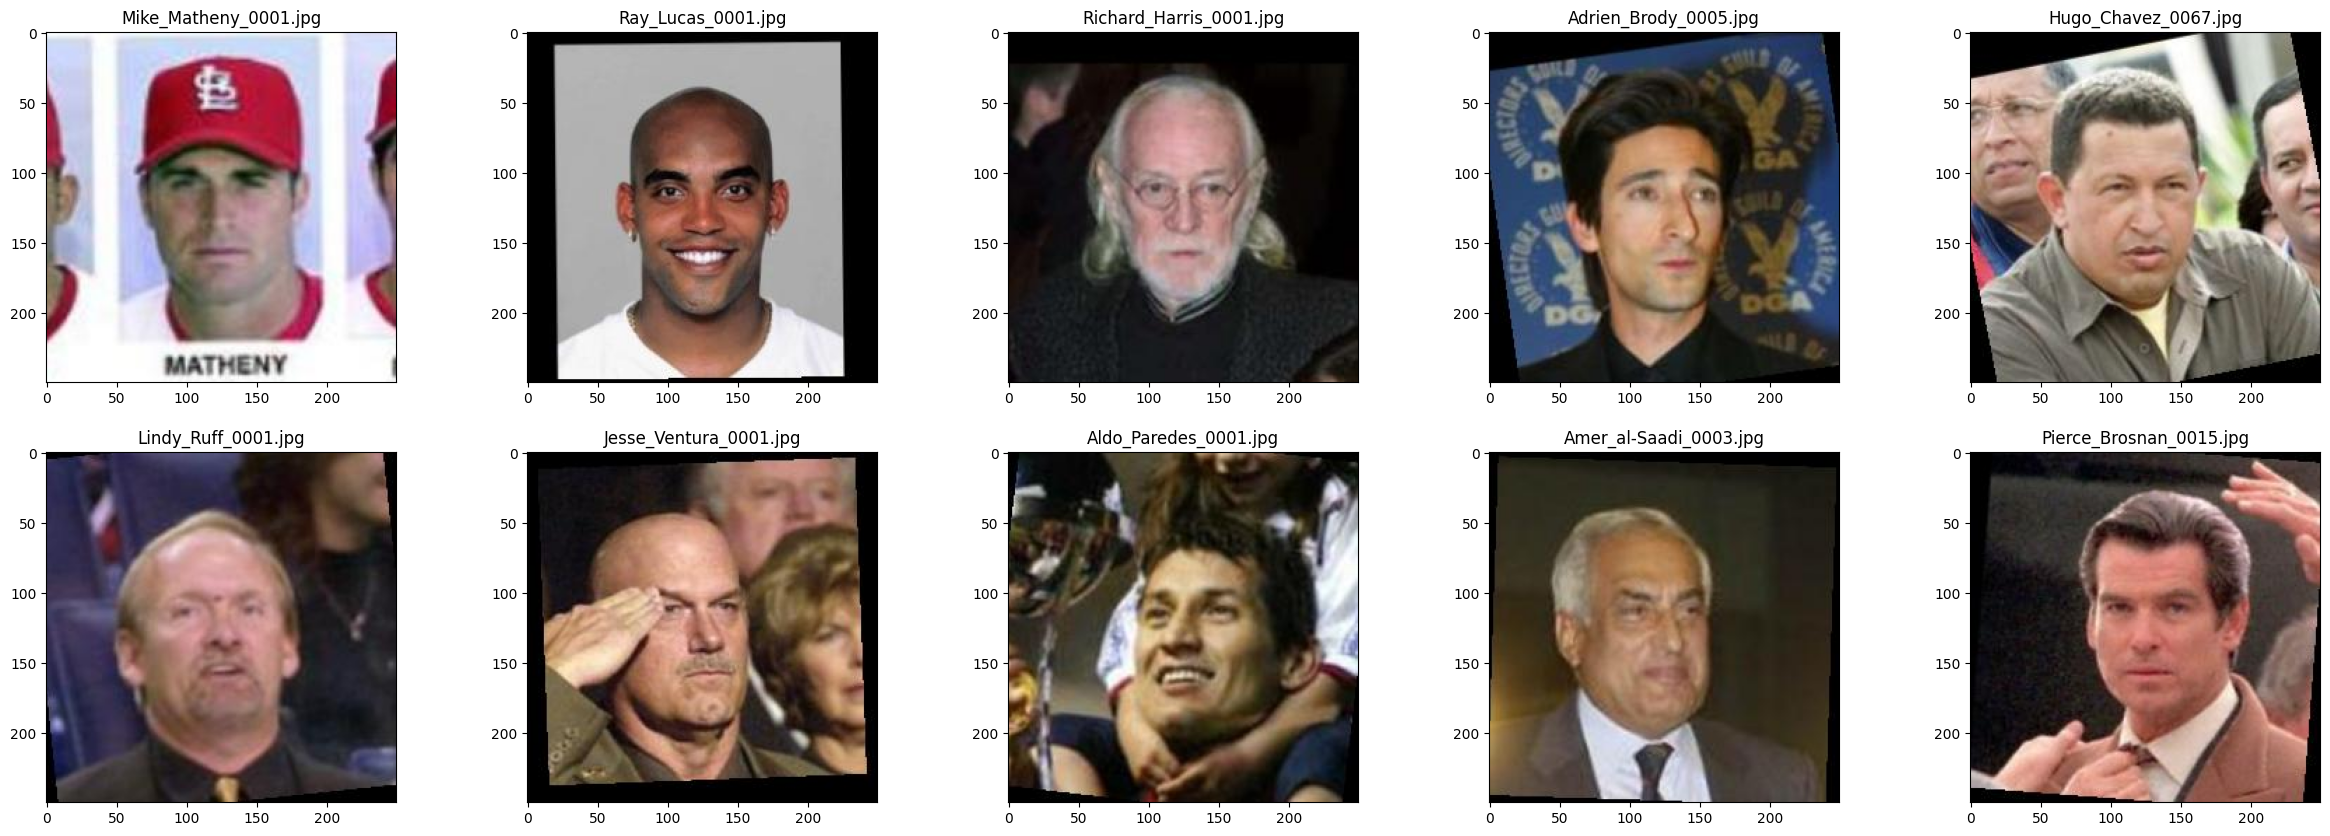

In [29]:
# Get a sample of 10 images
sample_images = random.sample(image_files, 10)

plt.figure(figsize=(30, 10))

for i, img_file in enumerate(sample_images):
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    # plt.axis('off')
    plt.title(img_file)

plt.show()

## Image Metadata Analysis

In [30]:
# Initialize lists to hold dimensions and file types
image_dimensions = []
image_types = []

# Loop through images to gather metadata
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)
    with Image.open(img_path) as img:
        image_dimensions.append(img.size)  # (width, height)
        image_types.append(img.format)      # File format

# Print statistics
print(f'Total Images: {len(image_dimensions)}')
print(f'Image Types: {set(image_types)}')
print(f'Image Dimensions: {image_dimensions[:100]}')

Total Images: 13233
Image Types: {'JPEG'}
Image Dimensions: [(250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (250, 250), (25

## Statistical Analysis

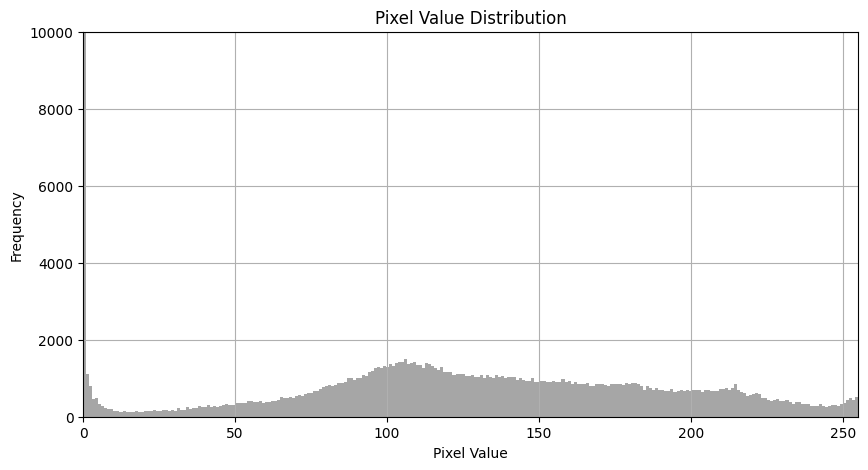

In [34]:
def plot_pixel_distribution(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)

    # Flatten the image array and get the pixel values
    pixels = img_array.flatten()

    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(pixels, bins=256, color='gray', alpha=0.7)
    plt.title('Pixel Value Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.ylim([0, 10000])
    plt.grid()
    plt.show()

# Example usage
sample_image = os.path.join(image_dir, sample_images[4])  # Use a random image from earlier
plot_pixel_distribution(sample_image)

## Image Transformations

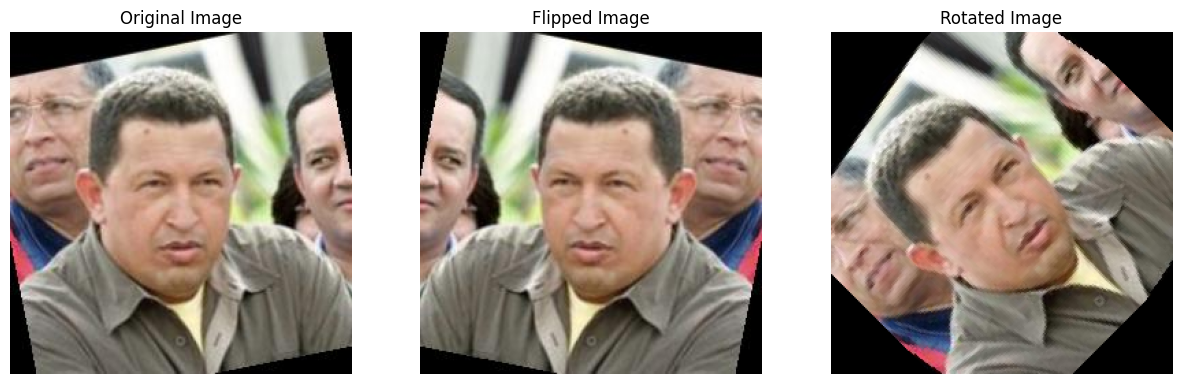

In [32]:
import matplotlib.pyplot as plt

def display_transformations(image_path):
    img = Image.open(image_path)

    # Transformations
    flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
    rotated_img = img.rotate(45)  # Rotate 45 degrees

    # Plot original and transformed images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(flipped_img)
    plt.title('Flipped Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(rotated_img)
    plt.title('Rotated Image')
    plt.axis('off')

    plt.show()

# Example usage
display_transformations(sample_image)

## Image Quality Assessment

In [33]:
def check_sharpness(image_path):
    img = Image.open(image_path)
    sharpness = img.filter(ImageFilter.SHARPEN)
    return sharpness

sharp_image = check_sharpness(sample_image)
sharp_image.show()